In [ ]:
#understading decision trees, random forests, xgboosts parameters and performance metrics
#regression and classification data

In [90]:
#import needed libraries
#do !pip install scikit-learn
import numpy as np
import pandas as pd
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import xgboost as xgb

In [103]:
df = pd.read_csv(r"C:\kannan\guvi\datasets\stroke_prediction\healthcare-dataset-stroke-data.csv")

In [4]:
df.describe

<bound method NDFrame.describe of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urba

In [6]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
feature_cols = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']


In [11]:
X = df[feature_cols]
Y = df['stroke']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [15]:
clf = DecisionTreeClassifier()
#clf = clf.fit(x_train,y_train)
#it expects all numeric data

In [104]:
df_gender = pd.get_dummies(df['gender'], dtype=float)
df_married = pd.get_dummies(df['ever_married'], dtype=float)
df_residence_type = pd.get_dummies(df['Residence_type'], dtype=float)
df_smoking_status = pd.get_dummies(df['smoking_status'], dtype=float)
df_work_type = pd.get_dummies(df['work_type'], dtype=float)

In [105]:
data_new = pd.concat([df_gender, df_married, df_residence_type, df_smoking_status, df_work_type, df], axis=1)

In [106]:
data_new_f = data_new.drop(['id','gender','ever_married','Residence_type','smoking_status', 'work_type'], axis=1)

In [107]:
data_new_f.describe()

,Female,Male,Other,No,Yes,Rural,Urban,Unknown,formerly smoked,never smoked,...,Never_worked,Private,Self-employed,children,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,...,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,0.585910,0.413894,0.000196,0.343836,0.656164,0.491977,0.508023,0.302153,0.173190,0.370254,...,0.004305,0.572407,0.160274,0.134442,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,0.492612,0.492578,0.013989,0.475034,0.475034,0.499985,0.499985,0.459236,0.378448,0.482920,...,0.065480,0.494778,0.366896,0.341160,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [108]:
data_new_f.columns

Index(['Female', 'Male', 'Other', 'No', 'Yes', 'Rural', 'Urban', 'Unknown',
       'formerly smoked', 'never smoked', 'smokes', 'Govt_job', 'Never_worked',
       'Private', 'Self-employed', 'children', 'age', 'hypertension',
       'heart_disease', 'avg_glucose_level', 'bmi', 'stroke'],
      dtype='object')

In [41]:
feature_columns = ['Female', 'Male', 'Other', 'No', 'Yes', 'Rural', 'Urban', 'Unknown',
       'formerly smoked', 'never smoked', 'smokes', 'Govt_job', 'Never_worked',
       'Private', 'Self-employed', 'children', 'age', 'hypertension',
       'heart_disease', 'avg_glucose_level', 'bmi']

In [110]:
X = data_new_f[feature_columns]
y = data_new_f['stroke']

In [111]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [46]:
clf = DecisionTreeClassifier()
#defualt criterion will be gini
clf = clf.fit(x_train,y_train)

In [47]:
y_pred = clf.predict(x_test)

In [48]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [49]:
metrics.accuracy_score(y_test,y_pred)

0.9021526418786693

In [53]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf = clf.fit(x_train,y_train)

In [54]:
y_pred = clf.predict(x_test)

In [55]:
metrics.accuracy_score(y_test,y_pred)

0.9412915851272016

In [58]:
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)

In [59]:
y_pred = rf.predict(x_test)

In [70]:
print(metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
#93.93% accuracy

0.9393346379647749


In [63]:
cm

array([[958,   4],
       [ 58,   2]], dtype=int64)

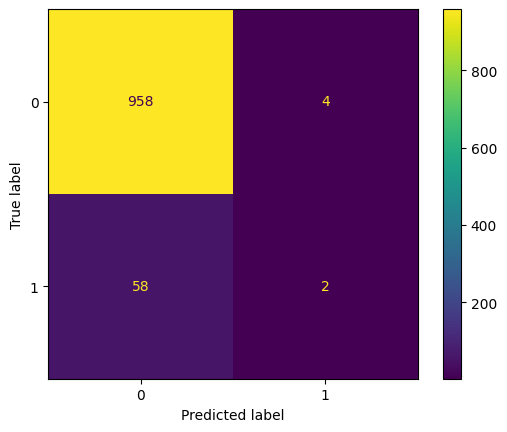

In [64]:
ConfusionMatrixDisplay(cm).plot()

In [66]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.3333333333333333
0.03333333333333333


In [67]:
feature_importances = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

<Axes: >

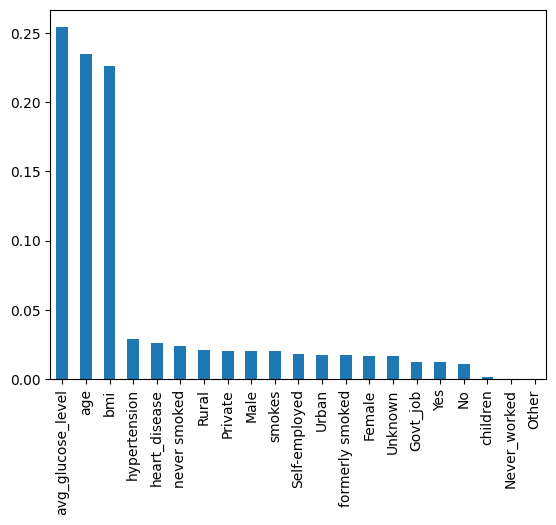

In [69]:
feature_importances.plot.bar()

In [74]:
#hyper parameter tuning
param_dist = {
    'n_estimators':random.randint(50,500),
    'max_depth': random.randint(1,20)
}

In [75]:
param_dist

{'n_estimators': 304, 'max_depth': 16}

In [81]:
param_dist = {
    'n_estimators':[random.randint(50,500)],
    'max_depth': [random.randint(1,20)]
}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=5,
    cv = 5
)
rand_search.fit(x_train, y_train)

c:\kannan\code\playground\.venv\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [17],
                                        'n_estimators': [308]})

In [82]:
best_rf = rand_search.best_estimator_

In [83]:
print(rand_search.best_params_)

{'n_estimators': 308, 'max_depth': 17}


0.9393346379647749


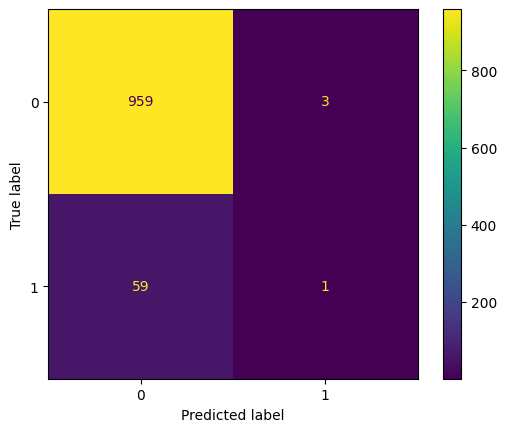

In [85]:
y_pred = best_rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

<Axes: >

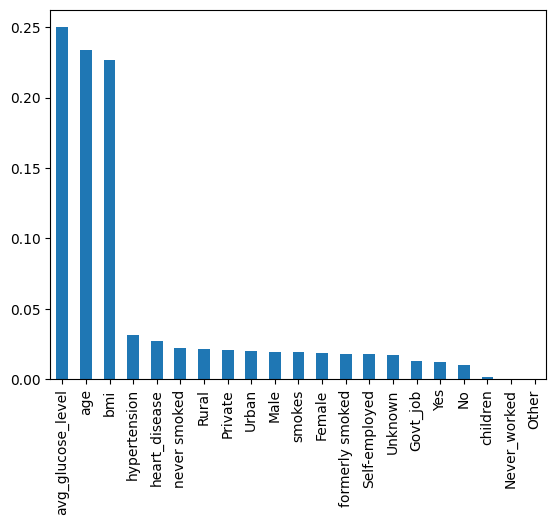

In [89]:
feature_importances = pd.Series(best_rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()

In [101]:
#xgb_classifier = xgb.XGBClassifier(n_estimators=20,objective='binary:logistic',tree_method='hist', eta=0.1,max_depth=3, enable_categorical=True)
model = xgb.XGBClassifier()
model = model.fit(x_train,y_train)
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [113]:
y_pred = model.predict(x_test)


In [114]:
print(accuracy_score(y_test,y_pred))

0.9285714285714286


In [116]:
#XGBoost classifier using Grid Search cv

param1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

gs = GridSearchCV(estimator = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=150,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=20),
    param_grid=param1,
    scoring='roc_auc', n_jobs=4, cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=150,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='roc_auc')

In [120]:
gs.best_score_

0.8391788026066115

In [121]:
best_xgb = gs.best_estimator_

0.9383561643835616


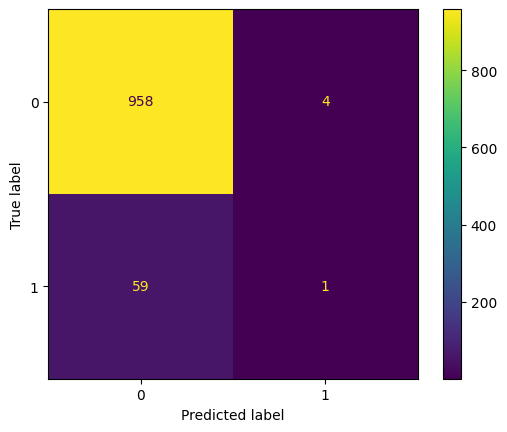

In [125]:
y_pred = best_xgb.predict(x_test)
print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

<Axes: >

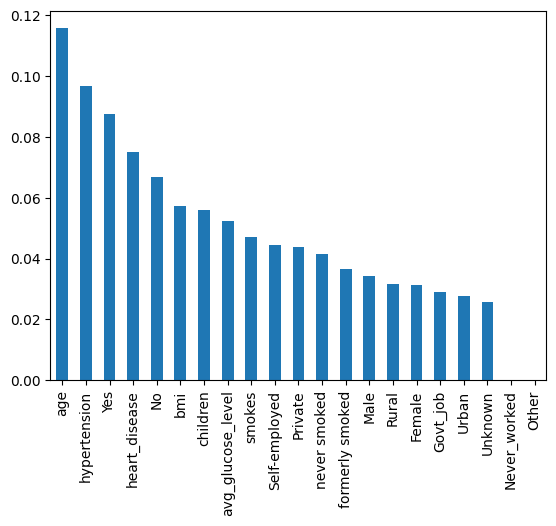

In [126]:
feature_importances = pd.Series(best_xgb.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()